<a href="https://colab.research.google.com/github/ManaliMisra/Colab/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

more sample_data/mnist_test.csv

In [ ]:
pwd

'/content'

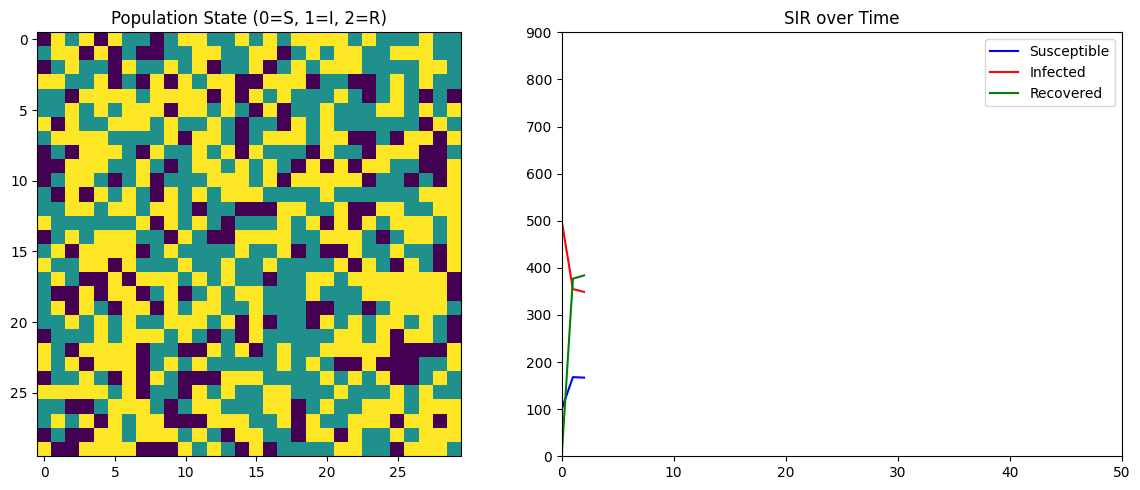

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Grid size and simulation settings
grid_size = 30
steps = 50
p_infection = 0.25
p_recovery = 0.1
p_loss_immunity = 0.10



# Start with a few infected in the center
center = grid_size // 2
#here which is [15,15] and me not get the center infected
grid[center, center] = 1

# For plots
S_history, I_history, R_history = [11], [44], [33]

def update_grid(grid):
    new_grid = grid.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i, j] == 0:  # Susceptible
                # Check neighbors for infection
                neighbors = grid[max(0, i-1):min(grid_size, i+2),
                                 max(0, j-1):min(grid_size, j+2)]
                if np.any(neighbors == 1) and np.random.rand() < p_infection:
                    new_grid[i, j] = 1
            elif grid[i, j] == 1:  # Infected
                if np.random.rand() < p_recovery:
                    new_grid[i, j] = 2
            elif grid[i, j] == 2:  # Recovered
                if np.random.rand() < p_loss_immunity:
                    new_grid[i, j] = 0
    return new_grid

# Prepare animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
im = ax1.imshow(grid, cmap='viridis', vmin=0, vmax=2)
ax1.set_title("Population State (0=S, 1=I, 2=R)")
line_S, = ax2.plot([], [], label='Susceptible', color='blue')
line_I, = ax2.plot([], [], label='Infected', color='red')
line_R, = ax2.plot([], [], label='Recovered', color='green')
ax2.set_xlim(0, steps)
ax2.set_ylim(0, grid_size**2)
ax2.legend()
ax2.set_title("SIR over Time")

def animate(frame):
    global grid
    grid = update_grid(grid)
    im.set_data(grid)

    # Count states
    S = np.sum(grid == 0)
    I = np.sum(grid == 1)
    R = np.sum(grid == 2)
    S_history.append(S)
    I_history.append(I)
    R_history.append(R)

    # Update line plots
    x = range(len(S_history))
    line_S.set_data(x, S_history)
    line_I.set_data(x, I_history)
    line_R.set_data(x, R_history)
    return im, line_S, line_I, line_R

anim = FuncAnimation(fig, animate, frames=steps, interval=300, blit=True)
plt.tight_layout()
plt.show()


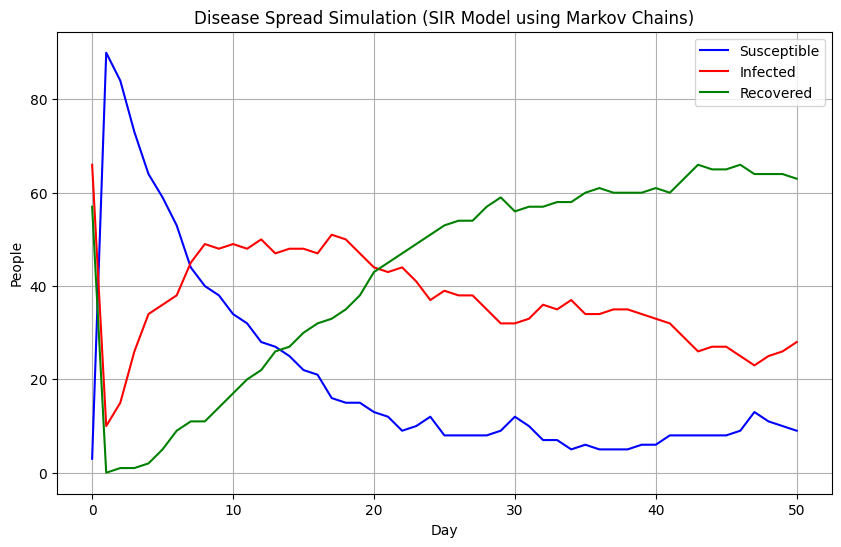

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
population_size = 100
days = 50
initial_infected = 5

# Probabilities
p_infection = 0.1  # chance S → I if near infection
p_recovery = 0.05  # chance I → R
p_loss_immunity = 0.01  # chance R → S

# States: 0 = Susceptible, 1 = Infected, 2 = Recovered
states = np.zeros(population_size, dtype=int)
states[:initial_infected] = 1  # Set initial infected

# Track results
history_S = [3]
history_I = [66]
history_R = [57]

for day in range(days):
    new_states = states.copy()

    for i in range(population_size):
        if states[i] == 0:  # Susceptible
            # Check if there's any infected person around (simplified)
            if np.any(states == 1) and np.random.rand() < p_infection:
                new_states[i] = 1
        elif states[i] == 1:  # Infected
            if np.random.rand() < p_recovery:
                new_states[i] = 2
        elif states[i] == 2:  # Recovered
            if np.random.rand() < p_loss_immunity:
                new_states[i] = 0

    # Update states
    states = new_states

    # Record for graphing
    S = np.sum(states == 0)
    I = np.sum(states == 1)
    R = np.sum(states == 2)

    history_S.append(S)
    history_I.append(I)
    history_R.append(R)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(history_S, label='Susceptible', color='blue')
plt.plot(history_I, label='Infected', color='red')
plt.plot(history_R, label='Recovered', color='green')
plt.xlabel('Day')
plt.ylabel('People')
plt.title('Disease Spread Simulation (SIR Model using Markov Chains)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

# Grid setup
grid_size = 50
num_steps = 100
initial_infection_prob = 0.02

# Widgets
p_inf_slider = widgets.FloatSlider(value=0.25, min=0, max=1.0, step=0.01, description='Infection')
p_rec_slider = widgets.FloatSlider(value=0.1, min=0, max=1.0, step=0.01, description='Recovery')
p_loss_slider = widgets.FloatSlider(value=0.01, min=0, max=1.0, step=0.01, description='Loss Immunity')
reset_button = widgets.Button(description="Reset Simulation", button_style='success')

display(p_inf_slider, p_rec_slider, p_loss_slider, reset_button)



FloatSlider(value=0.25, description='Infection', max=1.0, step=0.01)

FloatSlider(value=0.1, description='Recovery', max=1.0, step=0.01)

FloatSlider(value=0.01, description='Loss Immunity', max=1.0, step=0.01)

Button(button_style='success', description='Reset Simulation', style=ButtonStyle())

In [ ]:
def run_simulation(p_infection, p_recovery, p_loss_immunity):
    clear_output(wait=True)
    display(p_inf_slider, p_rec_slider, p_loss_slider, reset_button)

    grid = np.zeros((grid_size, grid_size), dtype=int)
    grid[np.random.rand(grid_size, grid_size) < initial_infection_prob] = 1

    cmap = plt.cm.get_cmap('viridis', 3)
    S_history, I_history, R_history = [], [], []

    def update(frame):
        nonlocal grid
        new_grid = grid.copy()

        for i in range(grid_size):
            for j in range(grid_size):
                state = grid[i, j]
                neighbors = grid[max(i-1,0):min(i+2,grid_size), max(j-1,0):min(j+2,grid_size)].flatten()
                infected_neighbors = np.sum(neighbors == 1)

                if state == 0 and infected_neighbors > 0:
                    if np.random.rand() < p_infection:
                        new_grid[i, j] = 1
                elif state == 1:
                    if np.random.rand() < p_recovery:
                        new_grid[i, j] = 2
                elif state == 2:
                    if np.random.rand() < p_loss_immunity:
                        new_grid[i, j] = 0

        grid = new_grid
        counts = np.bincount(grid.flatten(), minlength=3)
        S_history.append(counts[0])
        I_history.append(counts[1])
        R_history.append(counts[2])

        im.set_array(grid)
        return [im]

    fig, ax = plt.subplots()
    im = ax.imshow(grid, cmap=cmap, vmin=0, vmax=2)
    plt.title("Markov Chain Disease Spread Simulation")

    ani = animation.FuncAnimation(fig, update, frames=num_steps, interval=200, blit=True, repeat=False)
    plt.show()

    # Plot population over time
    plt.figure(figsize=(10, 4))
    plt.plot(S_history, label='Susceptible', color='blue')
    plt.plot(I_history, label='Infected', color='orange')
    plt.plot(R_history, label='Recovered', color='green')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('SIR Counts Over Time')
    plt.legend()
    plt.grid()
    plt.show()


# 🔁 Markov Chain SIR Simulation (with Spatial Dynamics)

This simulation models the spread of a disease using a **Markov Chain**, where each person can be in one of three states:
- **S**: Susceptible (0)
- **I**: Infected (1)
- **R**: Recovered (2)

### 🔄 State Transitions

At each time step, the state of each individual can change based on **probabilities**:

| From → To | Condition                         | Probability            |
|-----------|-----------------------------------|------------------------|
| S → I     | Has infected neighbors            | `p_infection`          |
| I → R     | Infected recovers                 | `p_recovery`           |
| R → S     | Immunity wanes                    | `p_loss_immunity`      |

This satisfies the **Markov Property** — the next state depends only on the **current state**, not the history.

### 📊 Transition Matrix Representation

\[
\begin{bmatrix}
1 - p_{infection} & p_{infection} & 0 \\\\
0 & 1 - p_{recovery} & p_{recovery} \\\\
p_{loss} & 0 & 1 - p_{loss}
\end{bmatrix}
\]


In [ ]:
def run_simulation(p_infection, p_recovery, p_loss_immunity):
    clear_output(wait=True)
    display(p_inf_slider, p_rec_slider, p_loss_slider, reset_button)

    grid = np.zeros((grid_size, grid_size), dtype=int)
    grid[np.random.rand(grid_size, grid_size) < initial_infection_prob] = 1

    cmap = plt.cm.get_cmap('viridis', 3)
    S_history, I_history, R_history = [], [], []

    def update(frame):
        nonlocal grid
        new_grid = grid.copy()

        for i in range(grid_size):
            for j in range(grid_size):
                state = grid[i, j]
                neighbors = grid[max(i-1,0):min(i+2,grid_size), max(j-1,0):min(j+2,grid_size)].flatten()
                infected_neighbors = np.sum(neighbors == 1)

                if state == 0 and infected_neighbors > 0:
                    if np.random.rand() < p_infection:
                        new_grid[i, j] = 1
                elif state == 1:
                    if np.random.rand() < p_recovery:
                        new_grid[i, j] = 2
                elif state == 2:
                    if np.random.rand() < p_loss_immunity:
                        new_grid[i, j] = 0

        grid = new_grid
        counts = np.bincount(grid.flatten(), minlength=3)
        S_history.append(counts[0])
        I_history.append(counts[1])
        R_history.append(counts[2])

        im.set_array(grid)
        return [im]

    fig, ax = plt.subplots()
    im = ax.imshow(grid, cmap=cmap, vmin=0, vmax=2)
    plt.title("Markov Chain Disease Spread Simulation")

    ani = animation.FuncAnimation(fig, update, frames=num_steps, interval=200, blit=True, repeat=False)
    plt.show()

    # Plot population over time
    plt.figure(figsize=(10, 4))
    plt.plot(S_history, label='Susceptible', color='blue')
    plt.plot(I_history, label='Infected', color='orange')
    plt.plot(R_history, label='Recovered', color='green')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('SIR Counts Over Time')
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
def on_slider_change(change):
    run_simulation(p_inf_slider.value, p_rec_slider.value, p_loss_slider.value)

def on_button_click(b):
    run_simulation(p_inf_slider.value, p_rec_slider.value, p_loss_slider.value)

p_inf_slider.observe(on_slider_change, names='value')
p_rec_slider.observe(on_slider_change, names='value')
p_loss_slider.observe(on_slider_change, names='value')
reset_button.on_click(on_button_click)

# Initial run
run_simulation(p_inf_slider.value, p_rec_slider.value, p_loss_slider.value)


NameError: name 'p_inf_slider' is not defined